In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('no_missing_data.csv')
data.head()

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%
1,070152668,1,1,Driver/Rider,Male,30.0,26 - 35,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%
2,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%
3,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%
4,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%


In [3]:
print('total casualties: ', len(data))

total casualties:  54778


In [4]:
accidents = data.groupby('accident_reference')
print('total accidents: ', len(accidents))

total accidents:  44095


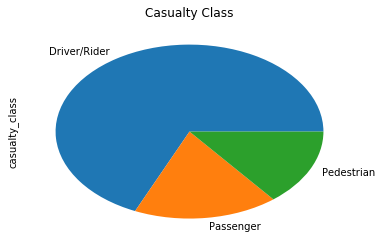

In [6]:
data.casualty_class.value_counts().plot.pie(title='Casualty Class');
plt.savefig('casualty_class.jpg')

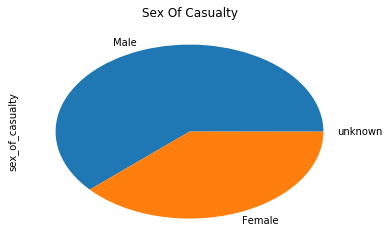

In [7]:
data.sex_of_casualty.value_counts().plot.pie(title='Sex Of Casualty');
plt.savefig('sex_of_casualty.jpg')

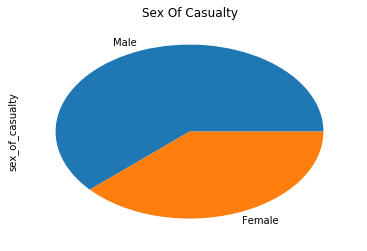

In [8]:
data = data[data.sex_of_casualty != 'unknown']
data.sex_of_casualty.value_counts().plot.pie(title='Sex Of Casualty');
plt.savefig('sex_of_casualty.jpg')

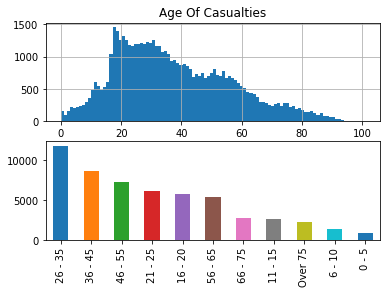

In [16]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title('Age Of Casualties')
data.age_of_casualty.hist(bins=100, ax=ax[0]);
data.age_band_of_casualty.value_counts().plot.bar(ax=ax[1]);
plt.savefig('age_of_casualty.jpg')

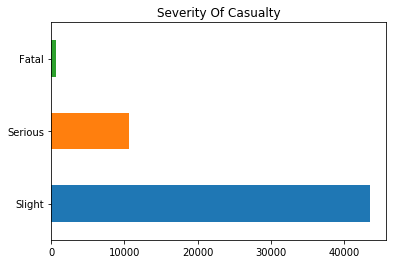

In [17]:
data.casualty_severity.value_counts().plot.barh(title='Severity Of Casualty');
plt.savefig('casualty_severity.jpg')

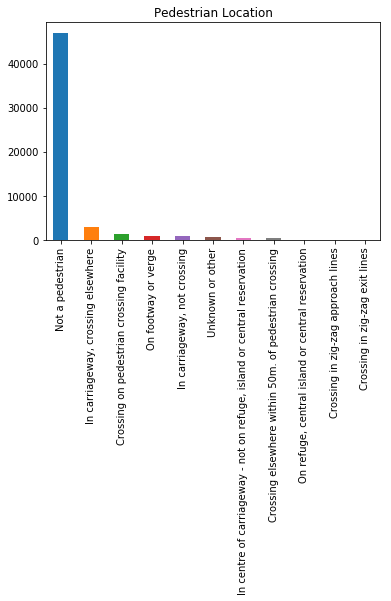

In [18]:
data.pedestrian_location.value_counts().plot.bar(title='Pedestrian Location');
plt.savefig('pedestrian_location.jpg')

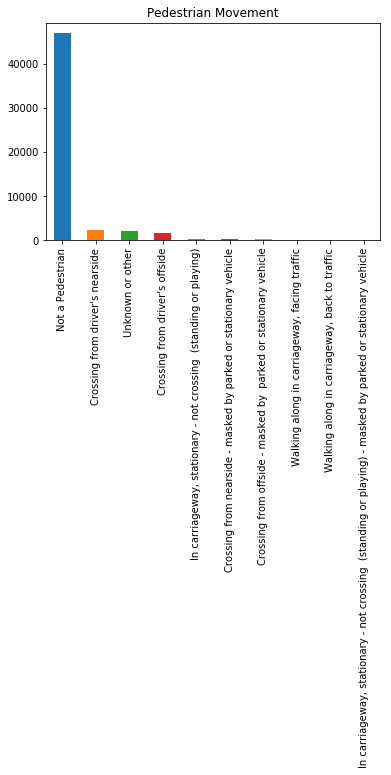

In [19]:
data.pedestrian_movement.value_counts().plot.bar(title='Pedestrian Movement');
plt.savefig('pedestrian_movement.jpg')

In [24]:
contradictory = ((data.pedestrian_location == 'Not a pedestrian') != (data.pedestrian_movement == 'Not a Pedestrian'))
contradictory.any()

True

In [25]:
contradictory.sum()

1

In [27]:
contradictory[contradictory == True]

30465    True
dtype: bool

In [28]:
data.loc[30465]

accident_reference                                          34NNC2522
vehicle_reference                                                   1
casualty_reference                                                  1
casualty_class                                           Driver/Rider
sex_of_casualty                                                  Male
age_of_casualty                                                    21
age_band_of_casualty                                          21 - 25
casualty_severity                                             Serious
pedestrian_location                                  Not a pedestrian
pedestrian_movement                   Crossing from driver's nearside
car_passenger                                       Not car passenger
bus_or_coach_passenger                   Not a bus or coach passenger
pedestrian_road_maintenance_worker                No / Not applicable
casualty_type                                            Car occupant
casualty_home_area_t

In [29]:
data.drop([30465], axis='index', inplace=True)

/home/ali/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


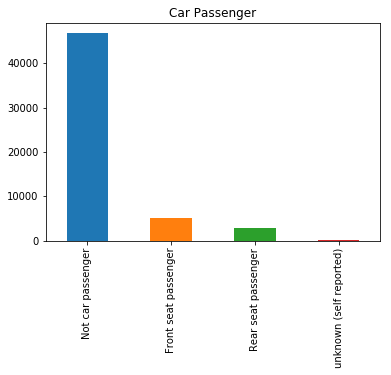

In [36]:
data.car_passenger.value_counts().plot.bar(title='Car Passenger');

In [38]:
data.drop(data[data.car_passenger == 'unknown (self reported)'].index, axis='index', inplace=True)

/home/ali/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


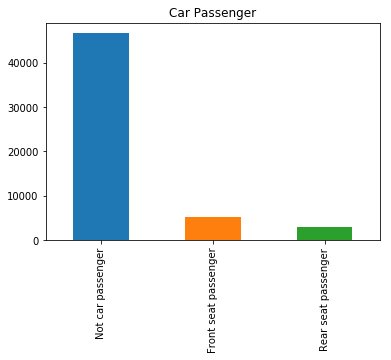

In [39]:
data.car_passenger.value_counts().plot.bar(title='Car Passenger');
plt.savefig('car_passenger.jpg')

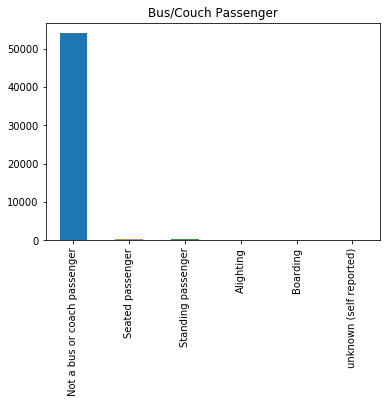

In [41]:
data.bus_or_coach_passenger.value_counts().plot.bar(title='Bus/Couch Passenger');
plt.savefig('bus_couch_passenger1.jpg')

/home/ali/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


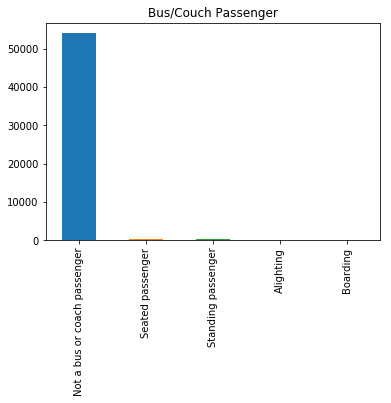

In [42]:
data.drop(data[data.bus_or_coach_passenger == 'unknown (self reported)'].index, inplace=True)
data.bus_or_coach_passenger.value_counts().plot.bar(title='Bus/Couch Passenger')
plt.savefig('bus_couch_passenger2.jpg')

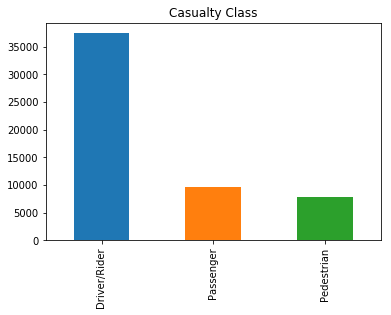

In [43]:
data.casualty_class.value_counts().plot.bar(title='Casualty Class');
plt.savefig('casualty_class_bar.jpg')

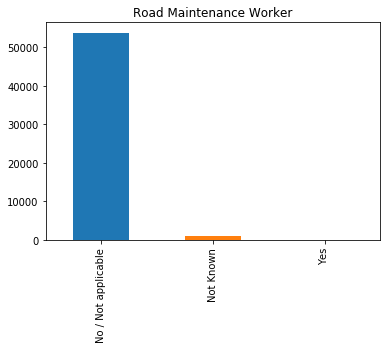

In [44]:
data.pedestrian_road_maintenance_worker.value_counts().plot.bar(title='Road Maintenance Worker');
plt.savefig('pedestrian_road_maintenance_worker.jpg')

/home/ali/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


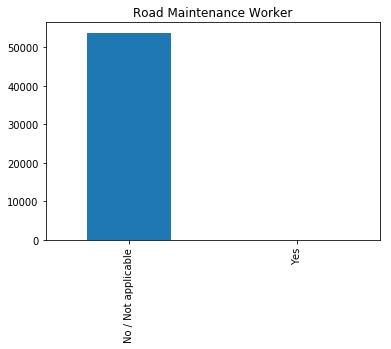

In [45]:
data.drop(data[data.pedestrian_road_maintenance_worker == 'Not Known'].index, inplace=True)
data.pedestrian_road_maintenance_worker.value_counts().plot.bar(title='Road Maintenance Worker');
plt.savefig('pedestrian_road_maintenance_worker.jpg')

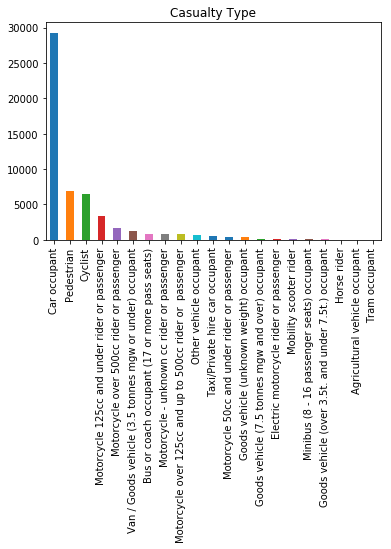

In [47]:
data.casualty_type.value_counts().plot.bar(title='Casualty Type');

In [49]:
casualty_class_pedestrian = data[data.casualty_class == 'Pedestrian'].index
casualty_type_pedestrian = data[data.casualty_type == 'Pedestrian'].index
casualty_class_pedestrian.equals(casualty_type_pedestrian)

True

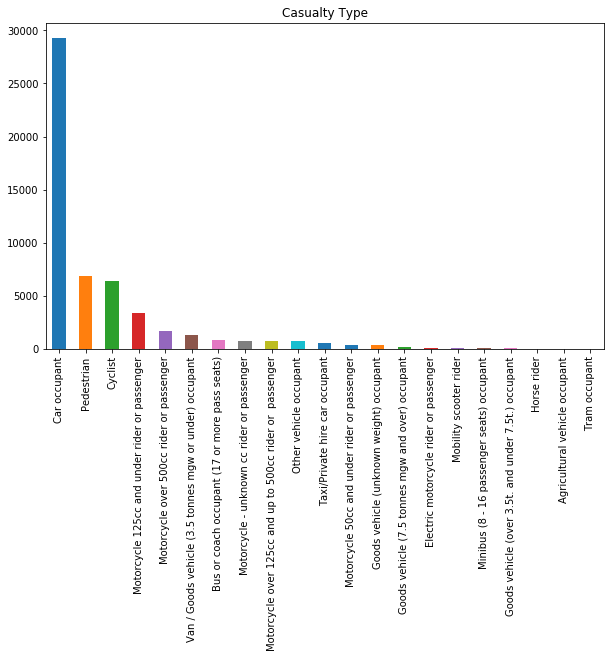

In [54]:
plt.figure(figsize=(10, 6))
data.casualty_type.value_counts().plot.bar(title='Casualty Type');
plt.savefig('casualty_type.jpg')

In [56]:
! pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:01
DEPRECATION: pandas 0.23.4 has a non-standard dependency specifier pytz>=2011k. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pandas or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [58]:
! pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:02
DEPRECATION: pandas 0.23.4 has a non-standard dependency specifier pytz>=2011k. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pandas or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [65]:
import plotly.express as px

value_counts = data['casualty_type'].value_counts()


fig = px.bar(x=value_counts.index, y=value_counts.values, labels={'x':'Casualty Type', 'y':'Count'}, title='Casualty Type')
fig.show()
fig.write_image("casualty_type_plotly.png")
# since write_image() method did not work properly and due to lack of time, figure was downloaded manually

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


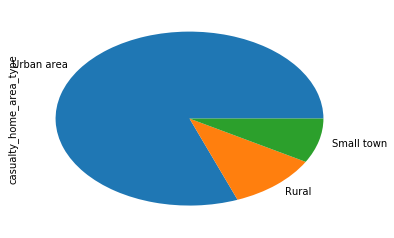

In [66]:
data.casualty_home_area_type.value_counts().plot.pie();
plt.savefig('home_area_type.jpg')

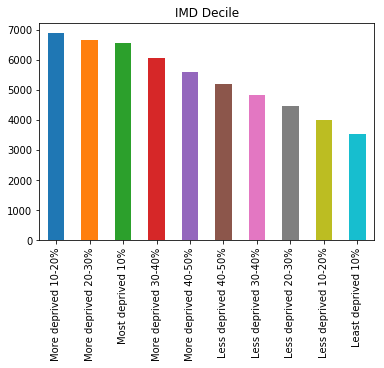

In [67]:
data.casualty_imd_decile.value_counts().plot.bar(title='IMD Decile');
plt.savefig('imd_decile.jpg')

/home/ali/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



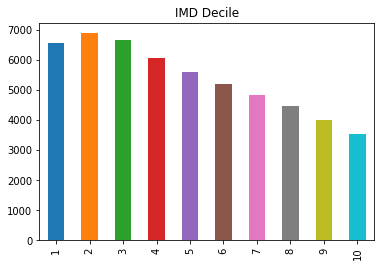

In [68]:
keys = [
    'Most deprived 10%',
    'More deprived 10-20%',
    'More deprived 20-30%',
    'More deprived 30-40%',
    'More deprived 40-50%',
    'Less deprived 40-50%',
    'Less deprived 30-40%',
    'Less deprived 20-30%',
    'Less deprived 10-20%',
    'Least deprived 10%',
]
values = list(range(1, 11))
mapper = dict(zip(keys, values))
data.casualty_imd_decile = data.casualty_imd_decile.apply(lambda x: mapper[x])
data.casualty_imd_decile.value_counts().sort_index().plot.bar(title='IMD Decile');
plt.savefig('imd_decile.jpg')

In [71]:
accident_vehicle_number = accidents['vehicle_reference'].size()
accident_casualty_number = accidents['casualty_reference'].size()

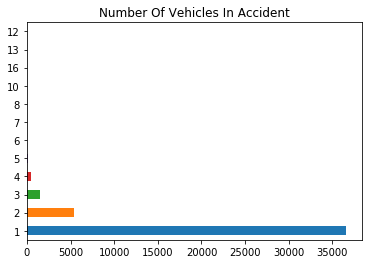

In [75]:
accident_vehicle_number.value_counts().plot.barh(title='Number Of Vehicles In Accident');
plt.savefig('accident_vehicle_number.jpg')

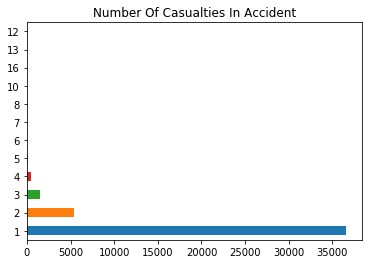

In [76]:
accident_casualty_number.value_counts().plot.barh(title='Number Of Casualties In Accident');
plt.savefig('accident_casualty_number.jpg')

In [77]:
columns_to_drop = [
    'pedestrian_location',
    'pedestrian_movement' ,
    'car_passenger',
    'bus_or_coach_passenger',
    'pedestrian_road_maintenance_worker',
]
preprocessed_data = data.drop(columns=columns_to_drop,)
preprocessed_data.head()

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,casualty_type,casualty_home_area_type,casualty_imd_decile
0,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Car occupant,Urban area,9
1,070152668,1,1,Driver/Rider,Male,30.0,26 - 35,Slight,Car occupant,Urban area,2
2,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Car occupant,Urban area,10
3,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Car occupant,Small town,10
4,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Car occupant,Rural,7


In [78]:
import pickle
preprocessed_data.to_csv('preprocessed_data.csv', index=True)
obj_to_save = {
    'data': preprocessed_data,
    'accidents': accidents,
    ''
}

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%
